Made By Sreya Dhar


06/20/2020

# Sentiment Classification with Natural Language Processing on LSTM 

Multiclass text classification using RNN :
Classify News under different categories. Dataset is provided here. 

Dataset description :
This dataset contains headlines, URLs, and categories for 422,937 news stories collected
by a web aggregator between March 10th, 2014 and August 10th, 2014.
News categories included in this dataset include business; science and technology;
entertainment; and health. Different news articles that refer to the same news item (e.g.,
several articles about recently released employment statistics) are also categorized
together.

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving uci-news-aggregator.csv to uci-news-aggregator.csv


In [ ]:
# %%
print (uploaded['uci-news-aggregator.csv'][:200].decode('utf-8') + '...')
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['uci-news-aggregator.csv'].decode('utf-8')))

In [ ]:
df=df[:10000]

In [ ]:
df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
df.shape

(10000, 8)


# Text Cleaning or Preprocessing

In [ ]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000):
    review = re.sub('[^a-zA-Z]', ' ', df['TITLE'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus=pd.DataFrame(corpus, columns=['TITLE']) 
corpus.head()

,TITLE
0,fed offici say weak data caus weather slow taper
1,fed charl plosser see high bar chang pace taper
2,us open stock fall fed offici hint acceler taper
3,fed risk fall behind curv charl plosser say
4,fed plosser nasti weather curb job growth


In [ ]:
result=corpus.join(df[['CATEGORY']])
result.head(2)

,TITLE,CATEGORY
0,fed offici say weak data caus weather slow taper,b
1,fed charl plosser see high bar chang pace taper,b


In [ ]:
result.groupby('CATEGORY').size()

CATEGORY
b    3449
e    3472
m     797
t    2282
dtype: int64

# TFIDF

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word has its respective TF and IDF score. The product of the TF and IDF scores of a word is called the TFIDF weight of that word.

Put simply, the higher the TFIDF score (weight), the rarer the word and vice versa

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(result_1['TITLE'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
X = tfidf.transform(result_1['TITLE'])
result_1['TITLE'][30]

'updat ecb reveal bad loan hurdl euro zone bank test sourc'

In [ ]:
print([X[30, tfidf.vocabulary_['test']]])

[0.22555745045519393]


In [ ]:
print([X[30, tfidf.vocabulary_['loan']]])

[0.30127338684860683]


In [ ]:
print([X[30, tfidf.vocabulary_['reveal']]])

[0.25802913589520343]


Among the three words, “test”, “loan” and “reveal”, tf-idf gives the highest weight to “loan”. Why? This indicates that “loan” is a much rarer word than “test” and “reveal”. This is how to use the tf-idf to indicate the importance of words or terms inside a collection of documents.

# Sentiment Classification

In [ ]:
# result['Positivity'] = np.where(result['Score'] > 3, 1, 0)
# cols = [ 'CATEGORY']
# result.drop(cols, axis=1, inplace=True)
label_1 = result['CATEGORY'].astype('category').cat.categories.tolist()
replace_map_comp_1 = {'CATEGORY' : {k: v for k,v in zip(label_1,list(range(1,len(label_1)+1)))}}

result_1 = result.copy()
result_1['CATEGORY'] = result_1['CATEGORY'].astype('category')
result_1['CATEGORY'] = result_1['CATEGORY'].cat.codes 
result_1.head(5)
# result_1.info()

,TITLE,CATEGORY
0,fed offici say weak data caus weather slow taper,0
1,fed charl plosser see high bar chang pace taper,0
2,us open stock fall fed offici hint acceler taper,0
3,fed risk fall behind curv charl plosser say,0
4,fed plosser nasti weather curb job growth,0


In [ ]:
result_1.groupby('CATEGORY').size()

CATEGORY
0    3449
1    3472
2     797
3    2282
dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = result_1.TITLE
y = result_1.CATEGORY
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
print("Train set has total {0} entries with {1:.2f}% 'b', {2:.2f}% 'e', {2:.2f}% 'm', {2:.2f}% 't'".format(len(X_train),
                                                                              (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                              (len(X_train[y_train == 1]) / (len(X_train)*1.))*100,
                                                                              (len(X_train[y_train == 2]) / (len(X_train)*1.))*100,
                                                                              (len(X_train[y_train == 3]) / (len(X_train)*1.))*100))

Train set has total 7500 entries with 34.64% 'b', 34.83% 'e', 34.83% 'm', 34.83% 't'


In [ ]:
print("Test set has total {0} entries with {1:.2f}% 'b', {2:.2f}% 'e', {2:.2f}% 'm', {2:.2f}% 't'".format(len(X_test),
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 1]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 2]) / (len(X_test)*1.))*100,
                                                                            (len(X_test[y_test == 3]) / (len(X_test)*1.))*100))

Test set has total 2500 entries with 34.04% 'b', 34.40% 'e', 34.40% 'm', 34.40% 't'


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
def accuracy_summary(pipeline, X_train, y_train, X_test, y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [ ]:
cv = CountVectorizer()
rf = RandomForestClassifier(class_weight="balanced")
n_features = np.arange(10000,25001,5000)

def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=rf):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Test result for 10000 features
accuracy score: 94.88%
Test result for 15000 features
accuracy score: 95.32%
Test result for 20000 features
accuracy score: 95.12%
Test result for 25000 features
accuracy score: 95.16%


In [ ]:
from sklearn.metrics import classification_report

cv = CountVectorizer(max_features=30000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', rf)
    ])
sentiment_fit = pipeline.fit(X_train, y_train)
y_pred = sentiment_fit.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['b','e', 'm','t']))

              precision    recall  f1-score   support

           b       0.91      0.96      0.93       851
           e       1.00      0.97      0.98       860
           m       0.97      0.93      0.95       212
           t       0.94      0.91      0.92       577

    accuracy                           0.95      2500
   macro avg       0.95      0.94      0.95      2500
weighted avg       0.95      0.95      0.95      2500



In [ ]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = pipeline, X= X_train, y = y_train,
                             cv = 20)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.95 (+/- 0.02)


# Chi2 Feature Selection

In [ ]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(result_1.TITLE)
y = result_1.CATEGORY
chi2score = chi2(X_tfidf, y)[0]

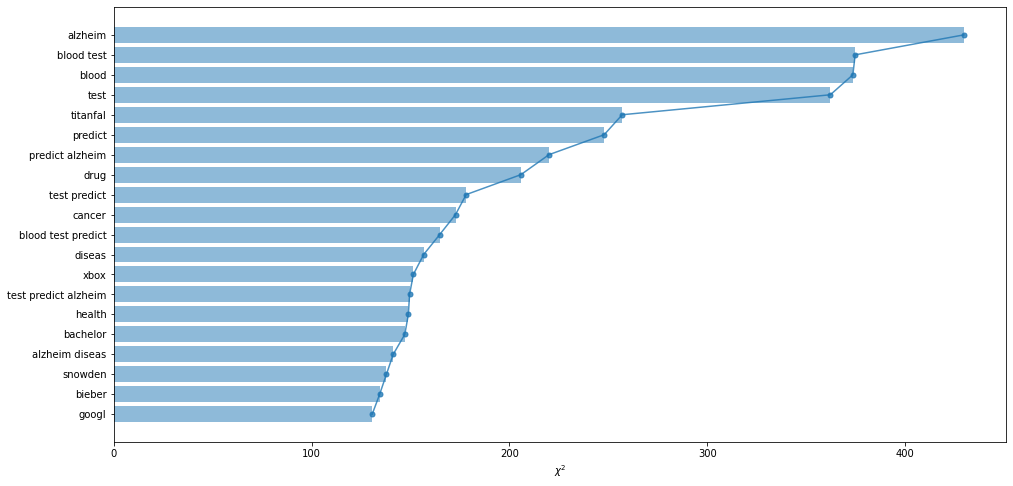

In [ ]:
plt.figure(figsize=(16,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();

# LSTM neural network

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [ ]:
max_fatures = 30000
tokenizer = Tokenizer(nb_words=max_fatures, split=' ')
tokenizer.fit_on_texts(result_1['TITLE'].values)
X1 = tokenizer.texts_to_sequences(result_1['TITLE'].values)
X1 = pad_sequences(X1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/text.py:180: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [ ]:
Y1 = pd.get_dummies(result_1['CATEGORY']).values
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, random_state = 42)
print(X1_train.shape,Y1_train.shape)
print(X1_test.shape,Y1_test.shape)

(7500, 14) (7500, 4)
(2500, 14) (2500, 4)


Keras Embedding Layer
Keras offers an Embedding layer that can be used for neural networks on text data.

It requires that the input data be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the Tokenizer API also provided with Keras.

The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

It can be used alone to learn a word embedding that can be saved and used in another model later.
It can be used as part of a deep learning model where the embedding is learned along with the model itself.
It can be used to load a pre-trained word embedding model, a type of transfer learning.
The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.
For example, below we define an Embedding layer with a vocabulary of 200 (e.g. integer encoded words from 0 to 199, inclusive), a vector space of 32 dimensions in which words will be embedded, and input documents that have 50 words each.


e = Embedding(200, 32, input_length=50)
1
e = Embedding(200, 32, input_length=50)
The Embedding layer has weights that are learned. If you save your model to file, this will include weights for the Embedding layer.

The output of the Embedding layer is a 2D vector with one embedding for each word in the input sequence of words (input document).

If you wish to connect a Dense layer directly to an Embedding layer, you must first flatten the 2D output matrix to a 1D vector using the Flatten layer.

In [ ]:
embed_dim = 150
lstm_out = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X1.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(4,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(200, dropout=0.2, recurrent_dropout=0.2)`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 14, 150)           4500000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               280800    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 804       
Total params: 4,781,604
Trainable params: 4,781,604
Non-trainable params: 0
_________________________________________________________________
None


Next, I compose the LSTM Network. Note that embed_dim, lstm_out, batch_size, droupout_x variables are hyperparameters, their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. The reason is that our Network is using categorical crossentropy, and softmax is just the right activation method for that.

In [ ]:
batch_size = 32
model.fit(X1_train, Y1_train, epochs = 10, batch_size=batch_size, verbose = 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
 - 25s - loss: 0.4489 - accuracy: 0.8316
Epoch 2/10
 - 24s - loss: 0.0768 - accuracy: 0.9752
Epoch 3/10
 - 26s - loss: 0.0426 - accuracy: 0.9875
Epoch 4/10
 - 32s - loss: 0.0302 - accuracy: 0.9885
Epoch 5/10
 - 30s - loss: 0.0291 - accuracy: 0.9896
Epoch 6/10
 - 32s - loss: 0.0217 - accuracy: 0.9919
Epoch 7/10
 - 32s - loss: 0.0213 - accuracy: 0.9924
Epoch 8/10
 - 31s - loss: 0.0243 - accuracy: 0.9917
Epoch 9/10
 - 31s - loss: 0.0201 - accuracy: 0.9929
Epoch 10/10
 - 27s - loss: 0.0156 - accuracy: 0.9941


In [ ]:
score,acc = model.evaluate(X1_test, Y1_test, verbose = 4, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.21
acc: 0.95



Finally measuring the number of correct guesses. It is clear that finding negative news goes very well for the Network but deciding whether is positive is not really.

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("b_pos_acc", pos_correct/pos_cnt*100, "%")
print("b_neg_acc", neg_correct/neg_cnt*100, "%")

b_pos_acc 94.26129426129425 %
b_neg_acc 95.47563805104409 %


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 1:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 1:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("e_pos_acc", pos_correct/pos_cnt*100, "%")
print("e_neg_acc", neg_correct/neg_cnt*100, "%")

e_pos_acc 93.29268292682927 %
e_neg_acc 97.32558139534883 %


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 2:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 2:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("m_pos_acc", pos_correct/pos_cnt*100, "%")
print("m_neg_acc", neg_correct/neg_cnt*100, "%")

m_pos_acc 94.81481481481482 %
m_neg_acc 93.17073170731707 %


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X1_test)):
    
    result = model.predict(X1_test[x].reshape(1,X1_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y1_test[x]):
        if np.argmax(Y1_test[x]) == 3:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y1_test[x]) == 3:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("t_pos_acc", pos_correct/pos_cnt*100, "%")
print("t_neg_acc", neg_correct/neg_cnt*100, "%")

t_pos_acc 96.05604566683965 %
t_neg_acc 90.0523560209424 %
